## import libraries

- stop displaying of warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

- import libraries

In [3]:
import pandas as pd
import glob
import os

import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,precision_score, recall_score, f1_score

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Read Data

- read dataset that we join in the last file
- display first 20 samples for demo purpose

In [4]:
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv('data/test.csv')

print("\n\nSample Data:")
print("============\n")
print(df1.head(20))



Sample Data:

    kurtosis  kurtosis.1  kurtosis.2  kurtosis.3  kurtosis.4  kurtosis.5  \
0   1.000000    2.000000    3.000000    4.000000    5.000000    6.000000   
1   3.856789    1.541901    0.000816    0.330728    0.118731   -0.342687   
2   2.624517    2.415293    0.440233   -0.782131   -0.771069   -0.724216   
3   5.076893    1.161854    2.095651    1.372743   -0.203574   -0.345354   
4   0.384906    1.203378    0.429393    0.639471   -0.080144   -0.440946   
5  -0.038922    4.771146   -0.378949   -0.309047   -0.661308   -0.531602   
6   3.482526    6.999774    1.099179    1.374592    0.082182   -0.034641   
7   1.072971    2.509553   -0.457227    0.762923    0.649274   -0.132112   
8   3.531016   11.265465    0.271847   -0.330451    0.411697    0.451828   
9  -0.536755    0.878468   -1.036644    0.084539    2.263659   -0.331764   
10  4.415954    4.862323    1.503381    1.816249   -0.340376    1.006949   
11 -0.585046    1.401965   -0.288332    0.786538    0.224412   -0.069836

## Utils Function
- count-digit funtion calculat the count of digit in a number (like 100 have the 3 digits)
- the purpose of above function is to just for displaying the equal sign qual to the leangth of digits.

- check-shape function count the number of rows and columns in the dataframe 

- modelEvaluation function takes the actual labels and predicted labels to calculate the the accuracy, precision, recall and f1-score

In [5]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))
    
def modelEvaluation(predictions, y_test_set, model_name, classes):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names = classes))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set,predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')
    
    plt.title('Confusion Matrix of {}'.format(model_name))
    plt.xlabel('predicted Labels')
    plt.ylabel('Actual Labels')
#     plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions,average='macro'),f1_score(y_test_set, predictions,average='macro')]#store results of model
    return results

# Understand Sample Data
## Dataset Samples and Features Count

- display the column names in the dataset
- display the count of samples in the dataset

In [6]:
# Understand Sample Data

print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(df1.columns)

print("\n\nNumber of Instances in Sample Data:",len(df1.index))
print("===================================={}\n".format(count_digit(len(df1.index))*'='))



Attributes in Sample Data:

Index(['kurtosis', 'kurtosis.1', 'kurtosis.2', 'kurtosis.3', 'kurtosis.4',
       'kurtosis.5', 'kurtosis.6', 'kurtosis.7', 'kurtosis.8', 'kurtosis.9',
       ...
       'std.11', 'std.12', 'std.13', 'std.14', 'std.15', 'std.16', 'std.17',
       'std.18', 'std.19', 'Class'],
      dtype='object', length=141)


Number of Instances in Sample Data: 6401



## Rename Columns
- just rename the column

In [7]:
# rename_column = True
# # column_dict = {"Existing Name": "New Column"}
# column_dict = {"C1": "time", "C2": "label"}

# if rename_column:
#     df = df.rename(columns=column_dict)
    
#     print("\n\nAttributes in Sample Data:")
#     print("==========================\n")
#     print(df.columns)
    
#     print("\n\nSample Data:")
#     print("============\n")
#     print(df.head(2))

## Initial Class Distribution
- check the class distribution in the dataframe.
- plot the class distribution in bar chat form

<AxesSubplot:xlabel='Class'>

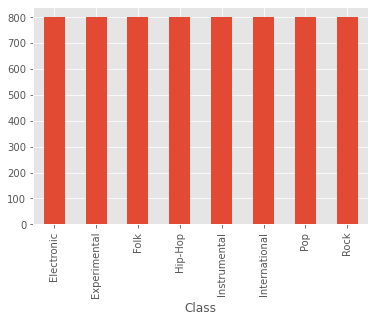

In [8]:
# print(df.label.value_counts(), "\n")

df1['Class'].value_counts()
plt.style.use('ggplot')
df1.value_counts('Class').plot(kind='bar')

- check the class distribution in the dataframe.
- plot the class distribution in pie chat form

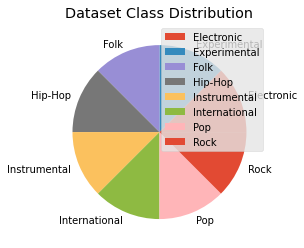

In [9]:
classes_counts = df1.value_counts('Class')
values = np.array(classes_counts)
mylabels = list(classes_counts.index)

plt.pie(values, labels = mylabels)
plt.legend()
plt.title('Dataset Class Distribution')
# plt.ylabel('Counts')
plt.show() 

# Label Encoding
- reset index

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Encode the values in the 'column' column
df1['Class'] = le.fit_transform(df1['Class'])
df2['Class'] = le.transform(df2['Class'])

# Feature Extraction
- remove the samples with Null and NAN values.

In [11]:
df1 = df1.iloc[1:,:]
df2 = df2.iloc[1:,:]

In [12]:
features = list(df1.columns[:-1])
X_train = df1[features]
y_train = df1['Class']
X_test = df2[features]
y_test = df2['Class']


- check the shape of the splited sets

In [13]:
print(X_train.shape)
print(X_test.shape)

(6400, 140)
(800, 140)


- display the class distribution in train and test set

# Machine Learning
- extract classes name into classes variable
- create a distionary to append the results of trained models

In [14]:
classes = list(df1['Class'].map(int).map(str).unique())
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
} #dic form store results of all models

## Logistic Regression
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [15]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

preds = lr_classifier.predict(X_test)

- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== LR ==========

Accuracy on validation set: 0.4113

Classification report : 
               precision    recall  f1-score   support

           3       0.46      0.57      0.51       100
           6       0.40      0.26      0.32       100
           2       0.12      0.13      0.13       100
           7       0.62      0.64      0.63       100
           1       0.46      0.36      0.40       100
           5       0.41      0.47      0.44       100
           0       0.27      0.26      0.26       100
           4       0.54      0.60      0.57       100

    accuracy                           0.41       800
   macro avg       0.41      0.41      0.41       800
weighted avg       0.41      0.41      0.41       800



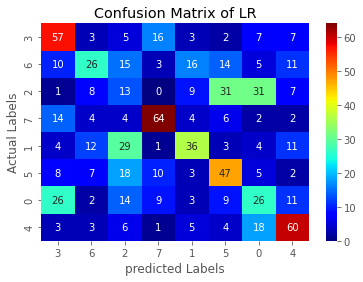

In [16]:
LR_res=modelEvaluation(preds, y_test, 'LR', classes)
collect_results_of_all_model["LR"] = LR_res

## Decision Tree Model
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [17]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier(random_state=0)
DT_classifier.fit(X_train,y_train)

preds = DT_classifier.predict(X_test)

## Desicion Tree Result

- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== DT ==========

Accuracy on validation set: 0.2913

Classification report : 
               precision    recall  f1-score   support

           3       0.30      0.32      0.31       100
           6       0.23      0.23      0.23       100
           2       0.16      0.13      0.15       100
           7       0.38      0.45      0.41       100
           1       0.35      0.34      0.35       100
           5       0.29      0.28      0.28       100
           0       0.23      0.23      0.23       100
           4       0.36      0.35      0.35       100

    accuracy                           0.29       800
   macro avg       0.29      0.29      0.29       800
weighted avg       0.29      0.29      0.29       800



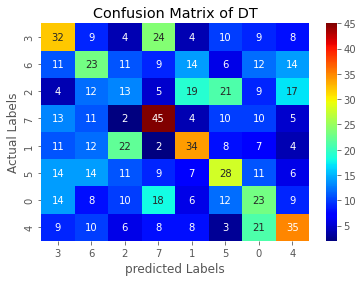

In [18]:
DT_res=modelEvaluation(preds, y_test, 'DT', classes)
collect_results_of_all_model["DT"] = DT_res

## Random Forest
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=5, bootstrap=100)
RF.fit(X_train,y_train)

preds_RF = RF.predict(X_test)

## Random Forest Results
- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== Random Forest ==========

Accuracy on validation set: 0.3825

Classification report : 
               precision    recall  f1-score   support

           3       0.34      0.39      0.36       100
           6       0.31      0.11      0.16       100
           2       0.23      0.29      0.26       100
           7       0.38      0.56      0.46       100
           1       0.42      0.47      0.45       100
           5       0.39      0.39      0.39       100
           0       0.55      0.12      0.20       100
           4       0.51      0.73      0.60       100

    accuracy                           0.38       800
   macro avg       0.39      0.38      0.36       800
weighted avg       0.39      0.38      0.36       800



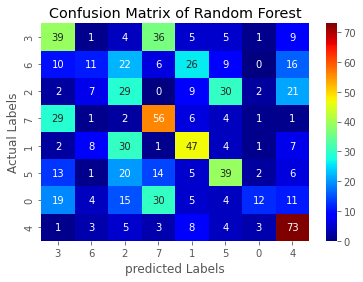

In [20]:
RF_res = modelEvaluation(preds_RF, y_test, 'Random Forest', classes)
collect_results_of_all_model["RF_CLassifier"] = RF_res

## Naive Bayes
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [21]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train,y_train)

preds = NB_classifier.predict(X_test)

## Naive Bayes Reuslts
- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== NB ==========

Accuracy on validation set: 0.3600

Classification report : 
               precision    recall  f1-score   support

           3       0.45      0.26      0.33       100
           6       0.39      0.24      0.30       100
           2       0.25      0.31      0.28       100
           7       0.38      0.72      0.50       100
           1       0.42      0.33      0.37       100
           5       0.24      0.14      0.18       100
           0       0.24      0.15      0.19       100
           4       0.43      0.73      0.54       100

    accuracy                           0.36       800
   macro avg       0.35      0.36      0.33       800
weighted avg       0.35      0.36      0.33       800



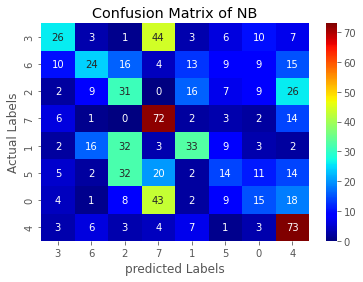

In [22]:
NB_res=modelEvaluation(preds, y_test, 'NB', classes)
collect_results_of_all_model["NB"] = NB_res

## AdaBoost 
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [23]:
from sklearn.ensemble import AdaBoostClassifier

AB_classifier = AdaBoostClassifier(n_estimators=10, random_state=0)
AB_classifier.fit(X_train,y_train)

preds = AB_classifier.predict(X_test)

## AdaBoost Result
- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== AdaBoot ==========

Accuracy on validation set: 0.2925

Classification report : 
               precision    recall  f1-score   support

           3       0.31      0.23      0.26       100
           6       0.29      0.05      0.09       100
           2       0.20      0.24      0.22       100
           7       0.37      0.69      0.48       100
           1       0.27      0.28      0.27       100
           5       0.19      0.06      0.09       100
           0       0.33      0.11      0.17       100
           4       0.29      0.68      0.41       100

    accuracy                           0.29       800
   macro avg       0.28      0.29      0.25       800
weighted avg       0.28      0.29      0.25       800



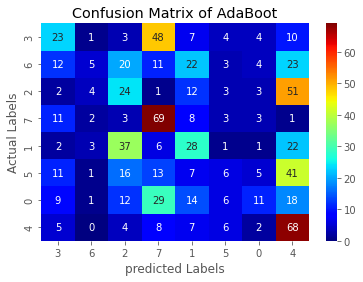

In [24]:
Ada_res=modelEvaluation(preds, y_test, 'AdaBoot', classes)
collect_results_of_all_model["Ada"] = Ada_res

## SVM Model

In [25]:
from sklearn.svm import SVC

SVC_classifier = SVC(max_iter=200)
SVC_classifier.fit(X_train,y_train)

preds = SVC_classifier.predict(X_test)

## SVM Results

========== SVM ==========

Accuracy on validation set: 0.1700

Classification report : 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       100
           6       0.50      0.02      0.04       100
           2       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           1       0.72      0.13      0.22       100
           5       0.20      0.10      0.13       100
           0       0.10      0.17      0.12       100
           4       0.17      0.94      0.29       100

    accuracy                           0.17       800
   macro avg       0.21      0.17      0.10       800
weighted avg       0.21      0.17      0.10       800



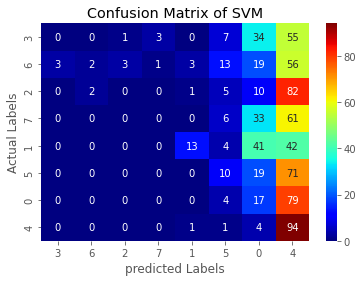

In [26]:
SVC_res=modelEvaluation(preds, y_test, 'SVM', classes)
collect_results_of_all_model["SVC"] = SVC_res

## KNN Model
- import model
- load model
- train model with training data
- make predictionwith trained model on test data

In [27]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
neighbors_clf.fit(X_train,y_train)

KNN_preds = neighbors_clf.predict(X_test)

## KNN Results
- calculate evaluation measures (accuracy, precision, recall, f1-score) using test labels and predicted labels
- append results into dictionary with the key of model name

========== KNN ==========

Accuracy on validation set: 0.3150

Classification report : 
               precision    recall  f1-score   support

           3       0.38      0.45      0.41       100
           6       0.15      0.13      0.14       100
           2       0.14      0.16      0.15       100
           7       0.52      0.59      0.55       100
           1       0.37      0.29      0.32       100
           5       0.27      0.29      0.28       100
           0       0.22      0.18      0.20       100
           4       0.44      0.43      0.44       100

    accuracy                           0.32       800
   macro avg       0.31      0.32      0.31       800
weighted avg       0.31      0.32      0.31       800



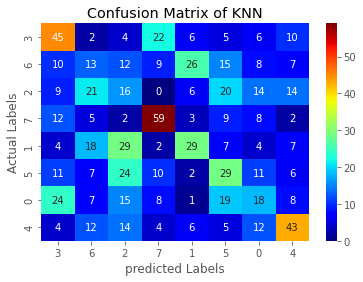

In [28]:
KNN_res = modelEvaluation(KNN_preds,y_test,'KNN',classes)
collect_results_of_all_model["KNN"] = KNN_res

## Customized NN

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=2)

In [54]:
# convert target list into categorical list
y_train1 = to_categorical(y_train,num_classes=81)
y_test1 = to_categorical(y_test,num_classes=81)
y_val1 = to_categorical(y_val,num_classes=81)
# display shape of all data sets
print("Shape of y_train",y_train1.shape)
print("Shape of y_test",y_test1.shape)
print("Shape of y_test",y_val1.shape)

NameError: name 'to_categorical' is not defined

In [55]:
# model development
model=Sequential()
model.add(Dense(1000,input_dim=5,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(81,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [56]:
# congigure early stopping teachnique
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, min_delta=.001, verbose=True, mode='max')
# fit model
model.fit(X_train,y_train1,validation_data=(X_val,y_val1), batch_size=20,epochs=50,verbose=1, callbacks=[callback])

NameError: name 'tf' is not defined

In [ ]:
# make prediction using trained model
predictions = model.predict(X_test)
# calculate accuracy and other evaluation measures
y_pred = [np.argmax(prediction) for prediction in predictions]
# make_predictions(y_test, y_pred)

In [ ]:
KNN_res = modelEvaluation(KNN_preds,y_test,'NN',classes)
collect_results_of_all_model["NN"] = NN_res

# Rsults Comparison
## Comparison Table
- create dataframe using distionary of model results
- set the index of dataframe
- display the dataframe

In [52]:
!pip install tabulate

In [29]:
from tabulate import tabulate 
metrics_data_frame = pd.DataFrame(collect_results_of_all_model) # create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics') # set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql')) # convert results in to table

+-----------+----------+----------+-----------------+----------+----------+----------+----------+
| Metrics   |       LR |       DT |   RF_CLassifier |       NB |      Ada |      SVC |      KNN |
|-----------+----------+----------+-----------------+----------+----------+----------+----------|
| accuracy  | 0.41125  | 0.29125  |        0.3825   | 0.36     | 0.2925   | 0.17     | 0.315    |
| precision | 0.408814 | 0.286336 |        0.390794 | 0.350587 | 0.281692 | 0.211543 | 0.310654 |
| recall    | 0.41125  | 0.29125  |        0.3825   | 0.36     | 0.2925   | 0.17     | 0.315    |
| f1-score  | 0.406254 | 0.288027 |        0.358486 | 0.334491 | 0.248549 | 0.101078 | 0.311003 |
+-----------+----------+----------+-----------------+----------+----------+----------+----------+


- display each row of the above dataframe into a single group
- in the below bar chat each group showed the accuracy, precision, recall, f1-score respectivelly for each model.

Text(0.5, 0, 'Evaluation Measure')

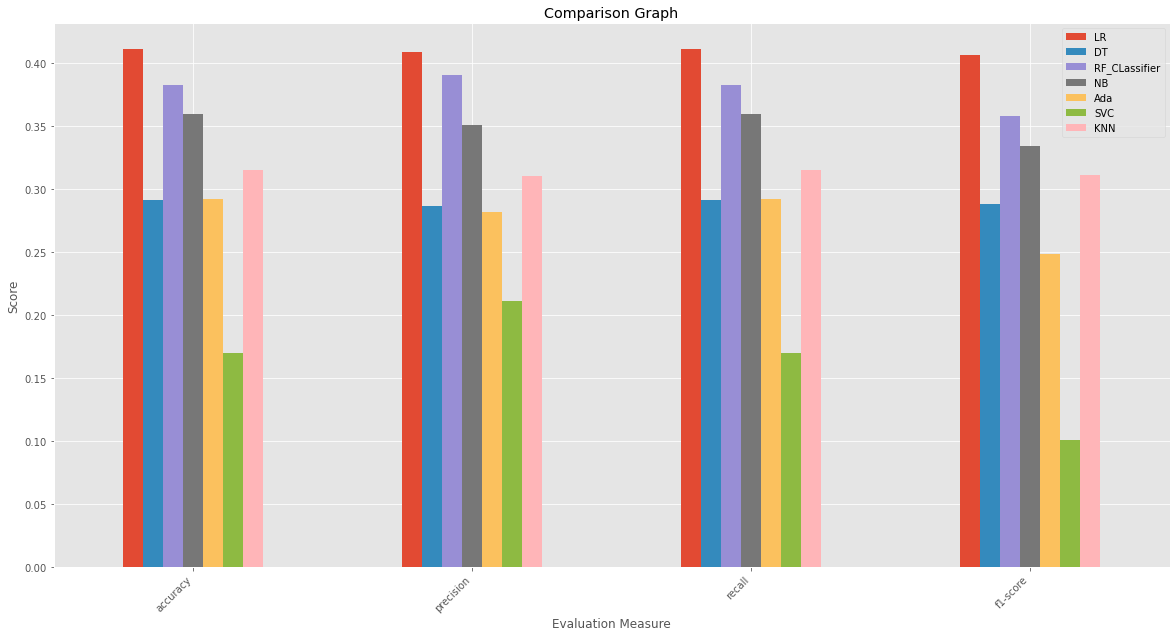

In [30]:
metrics_data_frame.plot(kind='bar', figsize=(20,10)) # sho comparison base of mertics
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Comparison Graph')
plt.ylabel('Score')
plt.xlabel("Evaluation Measure")